In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
# import imageio

from nelder_mead import *

In [2]:
def point_in_circle(point, x_0=5, y_0=5, r=25, return_bool=False):
    
    x, y = point
    if np.power(x + x_0, 2) + np.power(y + y_0, 2) < r:
        return True if return_bool else point
    else:
        return False if return_bool else (np.nan, np.nan)



def mishra_bird_func(point, in_feasibility_domain_func=point_in_circle):
    
    point = in_feasibility_domain_func(point)
    x, y = point

    func_value = np.sin(y) * np.power(np.e, np.power(1 - np.cos(x), 2)) + \
           np.cos(x) * np.power(np.e, np.power(1 - np.sin(y), 2)) + \
           np.power(x - y, 2)
    
    return func_value

In [3]:
plt.rcParams["figure.figsize"] = (5,5)

def plot_nelder_mead(optimizer, func):
    
    x = np.linspace(-10, 0, 410)
    X = np.repeat([x], 410, axis=0)
    y = np.linspace(0, -10, 410)
    Y = np.transpose(np.repeat([y], 410, axis=0))

    func_points = np.dstack((X, Y))
    Z = np.apply_along_axis(func, -1, func_points)

    # images = []

    for iter, (oracle, simplex) in enumerate(zip(optimizer.oracle_calls, optimizer.all_simplexes)):

        plt.title(f'Mishra\'s bird function\nIter: {iter+1} Oracle Calls: {oracle}', fontsize=12)
        plt.imshow(Z, cmap=cm.magma, extent=[-10, 0, -10, 0])
        x_point, y_point = np.transpose(simplex)
        plt.scatter(x_point, y_point, color='g')

        r_sim = np.dstack((simplex, np.roll(simplex, 1, axis=0)))
        r_sim[1:] = np.flip(r_sim[1:], 2)

        for points_c in r_sim:
            x_c, y_c = points_c
            plt.plot(x_c, y_c, color='g')
        
        # plt.savefig(f'iteration_{iter}.png')
        # images.append(imageio.imread(f'iteration_{iter}.png'))
        # plt.clf()
            
        plt.show()
    
    # imageio.mimsave('plot_animation.gif', images, duration=0.5)

In [4]:
optimizer = NelderMeadOptimizer(e_area=10e-7, e_value=-50, max_iters=15, obj_func=mishra_bird_func)
optimizer.optimize()

print(f'Best simplex:\n{optimizer.all_simplexes[-1]}')
print(f'Best value:\n{optimizer.simplex_values[-1]}')

Best simplex:
[[-9.14184051 -7.57978822]
 [-8.95596861 -7.809061  ]
 [-9.1008558  -7.79492601]]
Best value:
-94.08035573846091


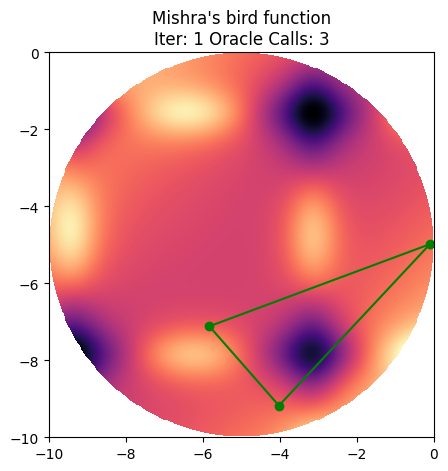

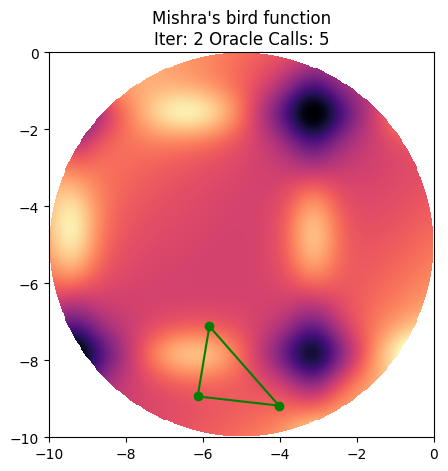

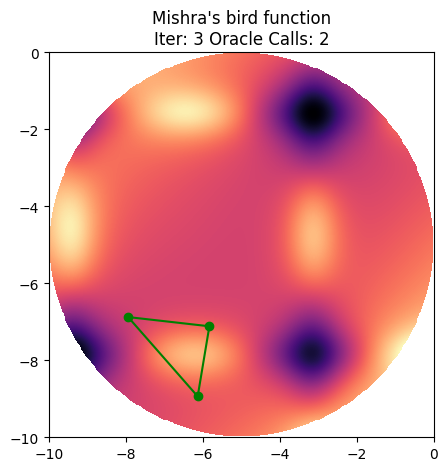

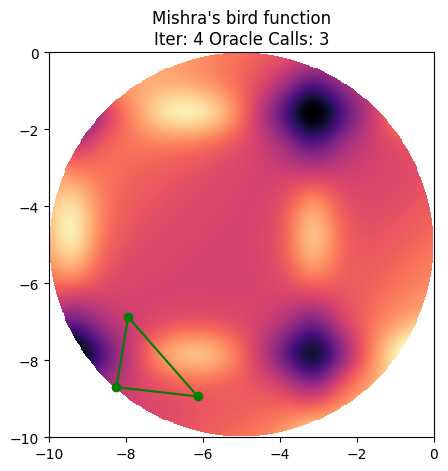

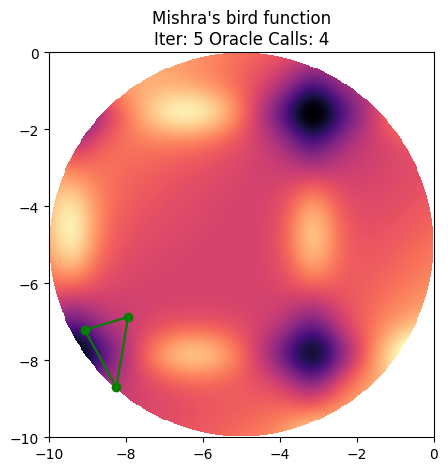

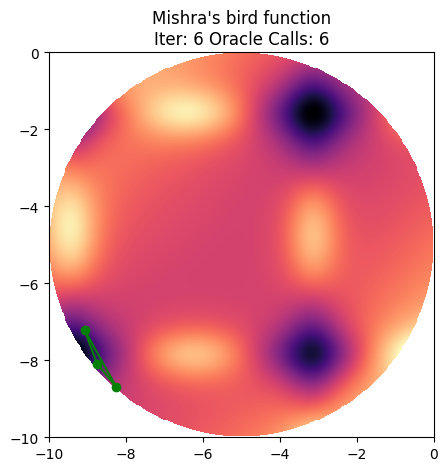

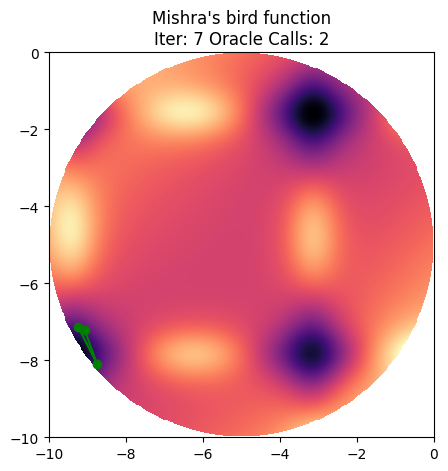

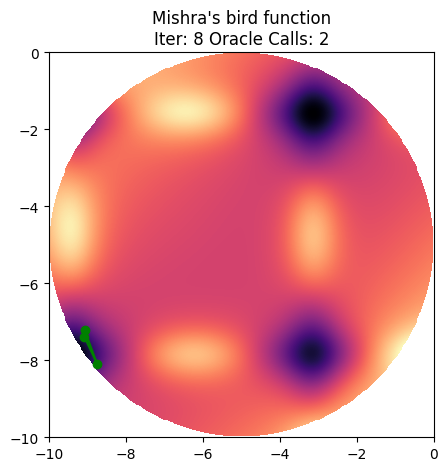

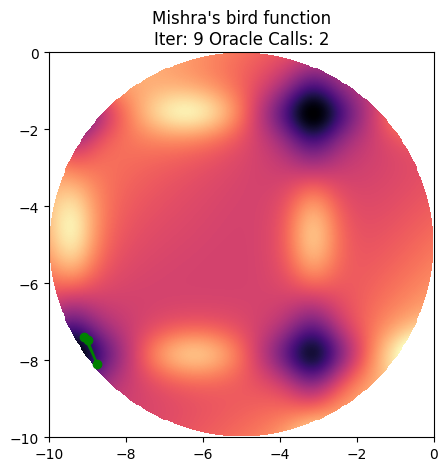

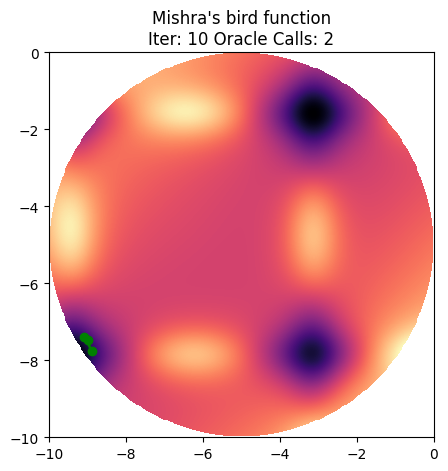

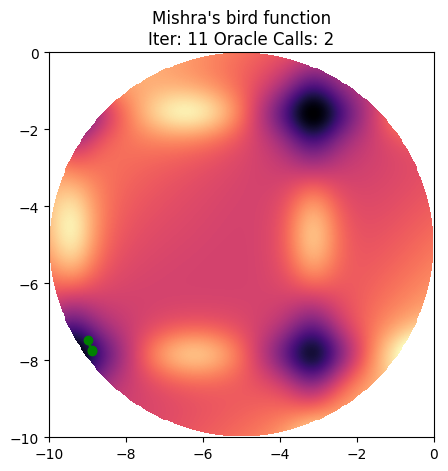

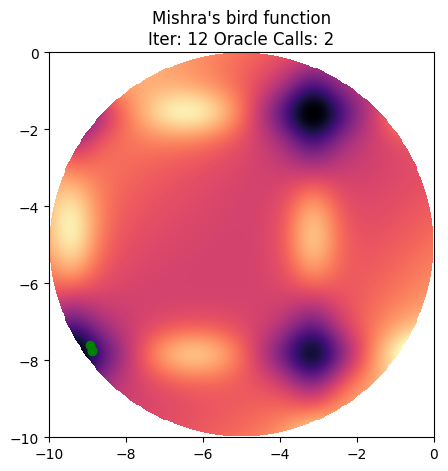

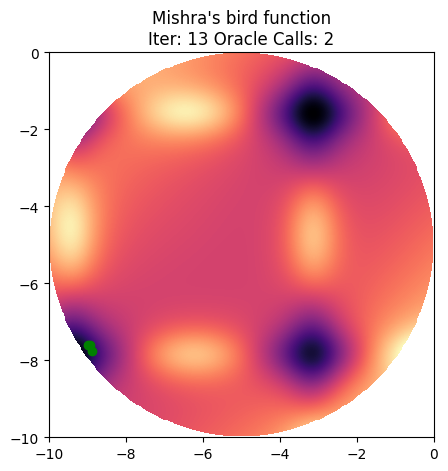

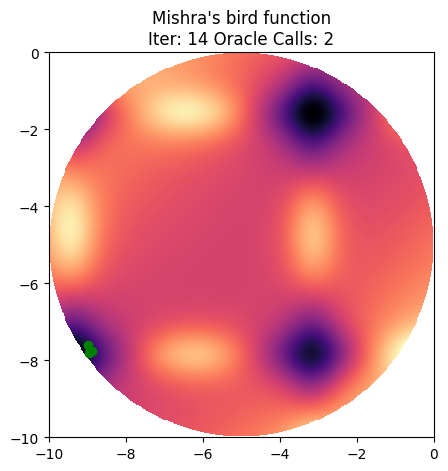

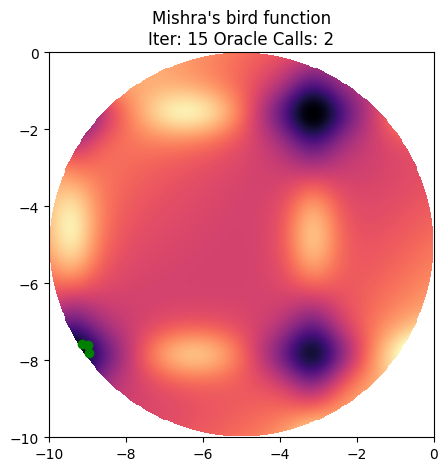

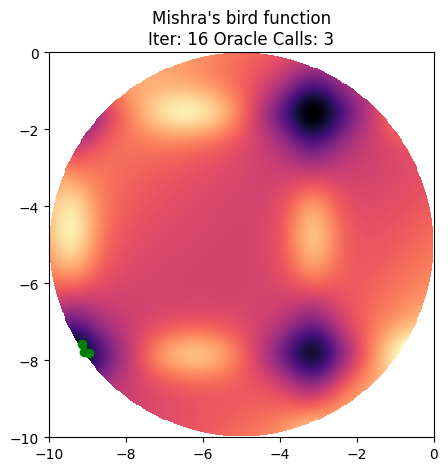

In [5]:
plot_nelder_mead(optimizer, mishra_bird_func)